# Global Power Plant

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [2]:
#Reading the Dataset
df=pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
#checking and droping for duplicates items
df.duplicated().any()
df.drop_duplicates()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
df=df.drop(["estimated_generation_gwh","generation_gwh_2019","generation_gwh_2013","wepp_id","other_fuel3","other_fuel2","country","country_long","year_of_capacity_data","name","source","url","owner"],axis=1)
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [11]:
#replacing the null values
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0],inplace=True)
df['longitude'].fillna(df['longitude'].mode()[0],inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(),inplace=True)

In [12]:
df.isnull().sum()

gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                907 non-null    float64
 3   longitude               907 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   other_fuel1             907 non-null    object 
 6   commissioning_year      907 non-null    float64
 7   geolocation_source      907 non-null    object 
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(9), object(5)
memory usage: 99.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ["gppd_idnr","primary_fuel","other_fuel1","geolocation_source","generation_data_source"]

for i in Label:
    df[i] = le.fit_transform(df[i])

## Visualization of Dataset

## Pair Plot

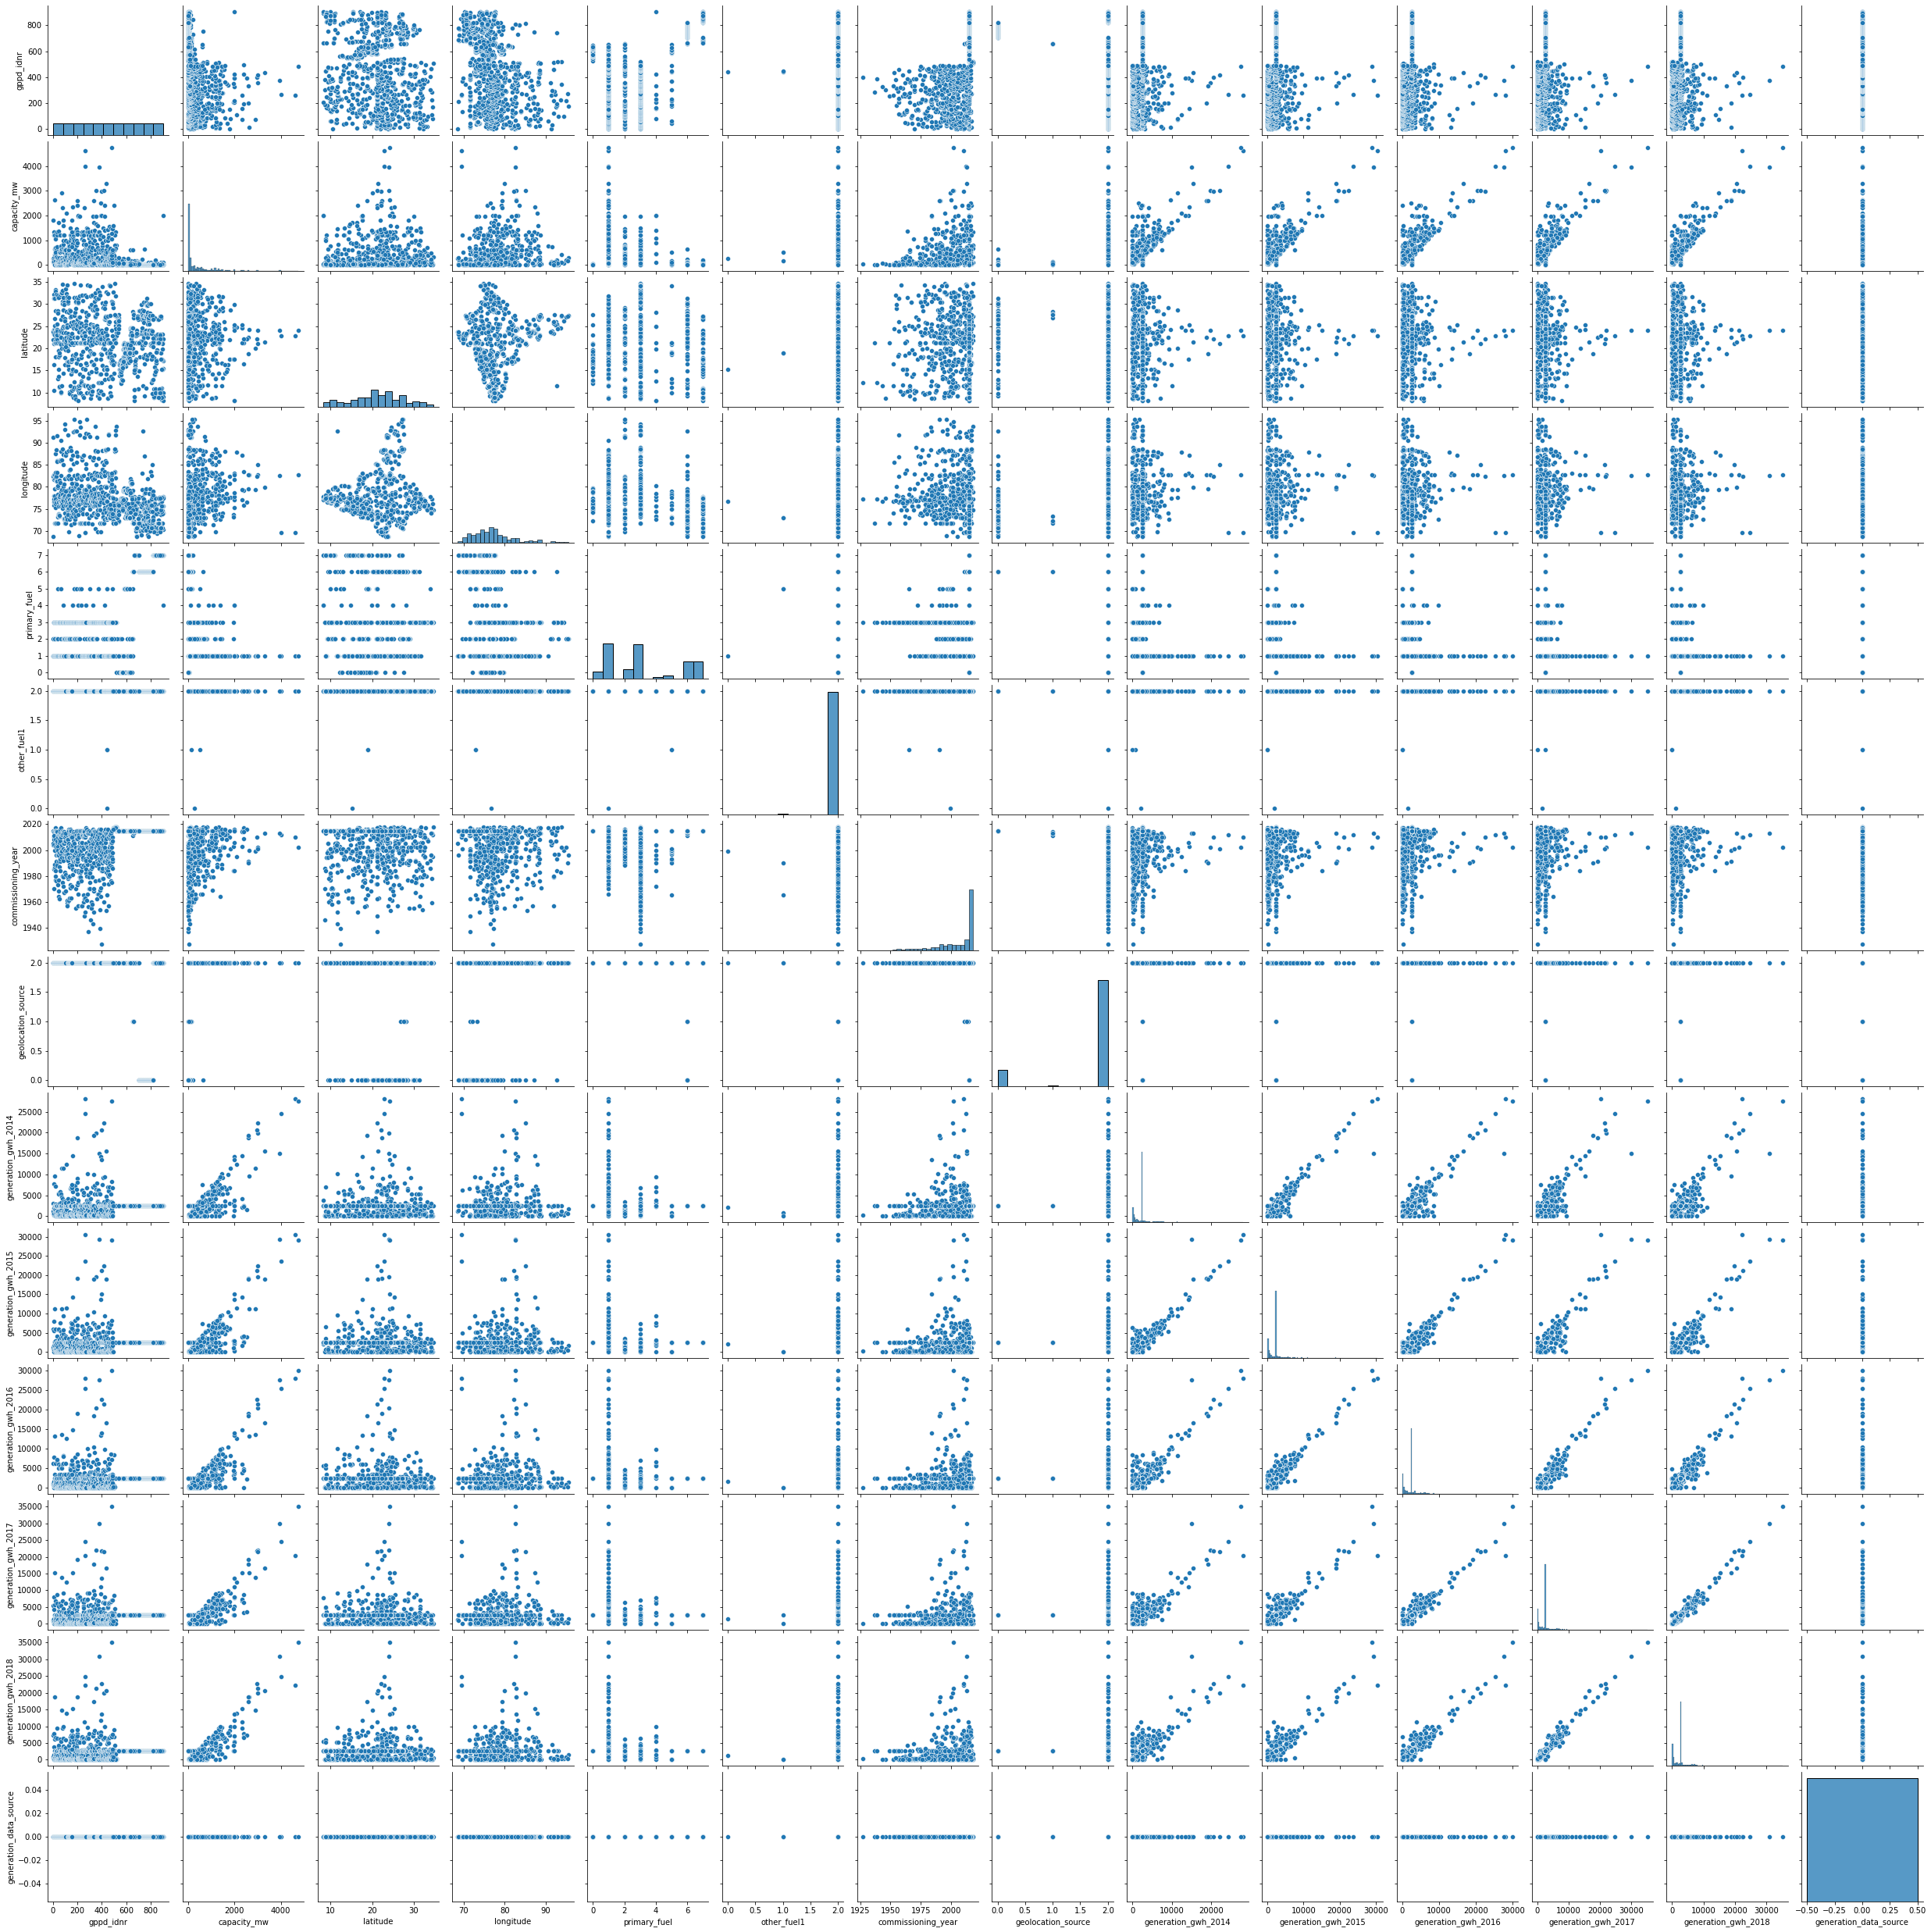

In [16]:
sns.pairplot(df)

## Box Plot

gppd_idnr                    AxesSubplot(0.125,0.749828;0.133621x0.130172)
capacity_mw               AxesSubplot(0.285345,0.749828;0.133621x0.130172)
latitude                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
longitude                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
other_fuel1               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
commissioning_year           AxesSubplot(0.125,0.593621;0.133621x0.130172)
geolocation_source        AxesSubplot(0.285345,0.593621;0.133621x0.130172)
generation_gwh_2014        AxesSubplot(0.44569,0.593621;0.133621x0.130172)
generation_gwh_2015       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
generation_gwh_2016       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
generation_gwh_2017          AxesSubplot(0.125,0.437414;0.133621x0.130172)
generation_gwh_2018       AxesSubplot(0.285345,0.437414;0.133621x0.130172)
generation_data_source     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
dtype: object

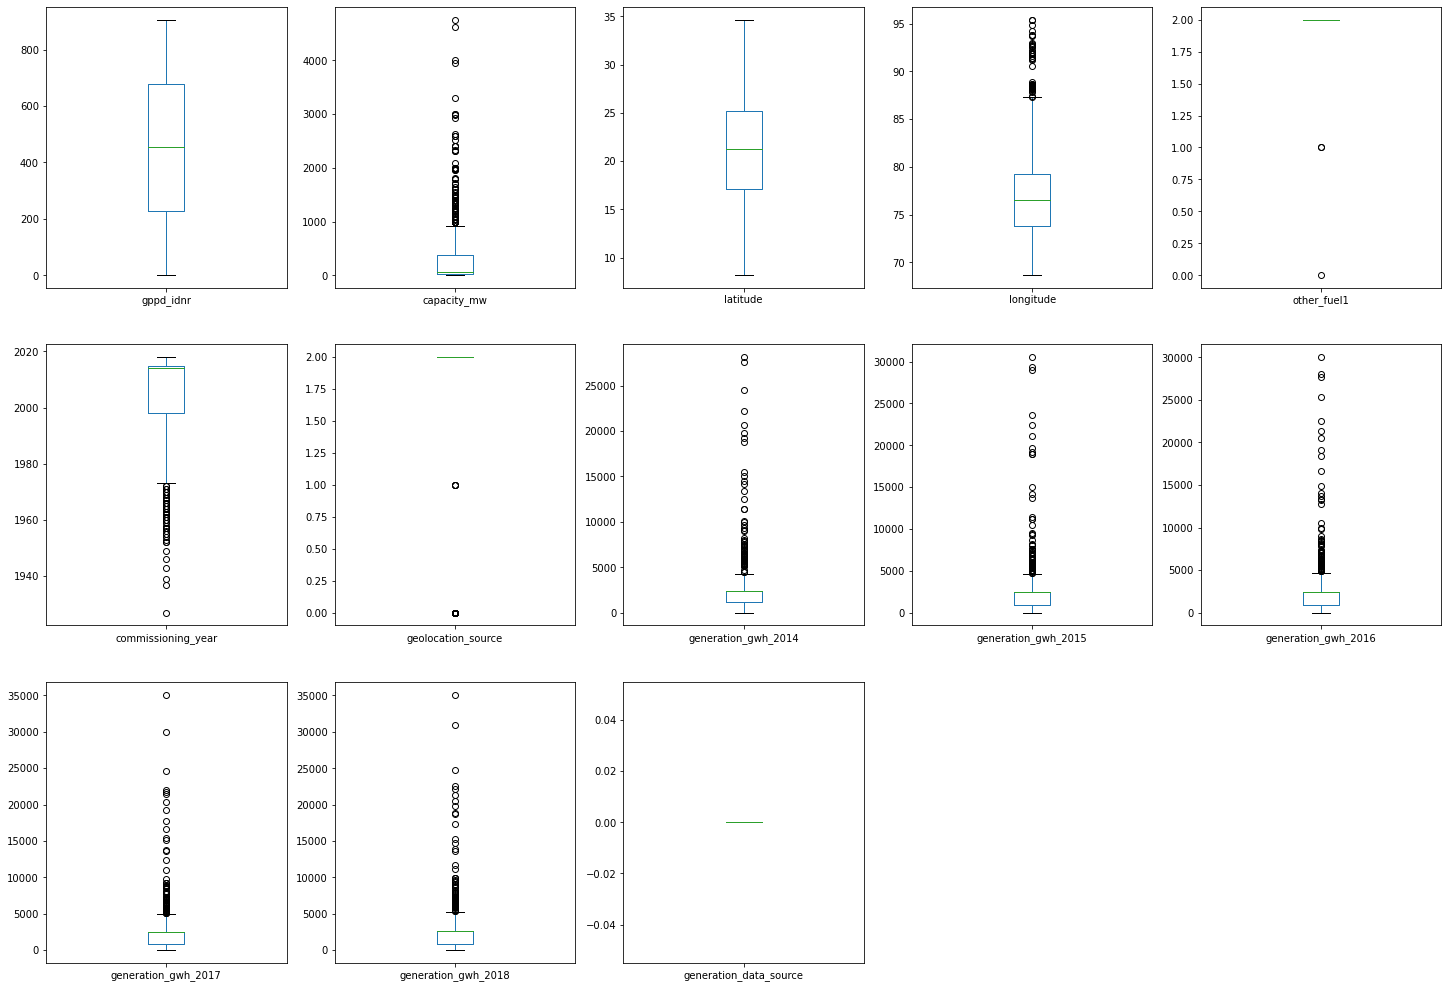

In [17]:
df.drop(["primary_fuel"],axis=1).plot(kind='box',subplots=True,layout=(5,5),figsize=(25,30))

## Scatter Plot

In [18]:
X=df.drop(["primary_fuel"],axis=1)
Y=df.primary_fuel

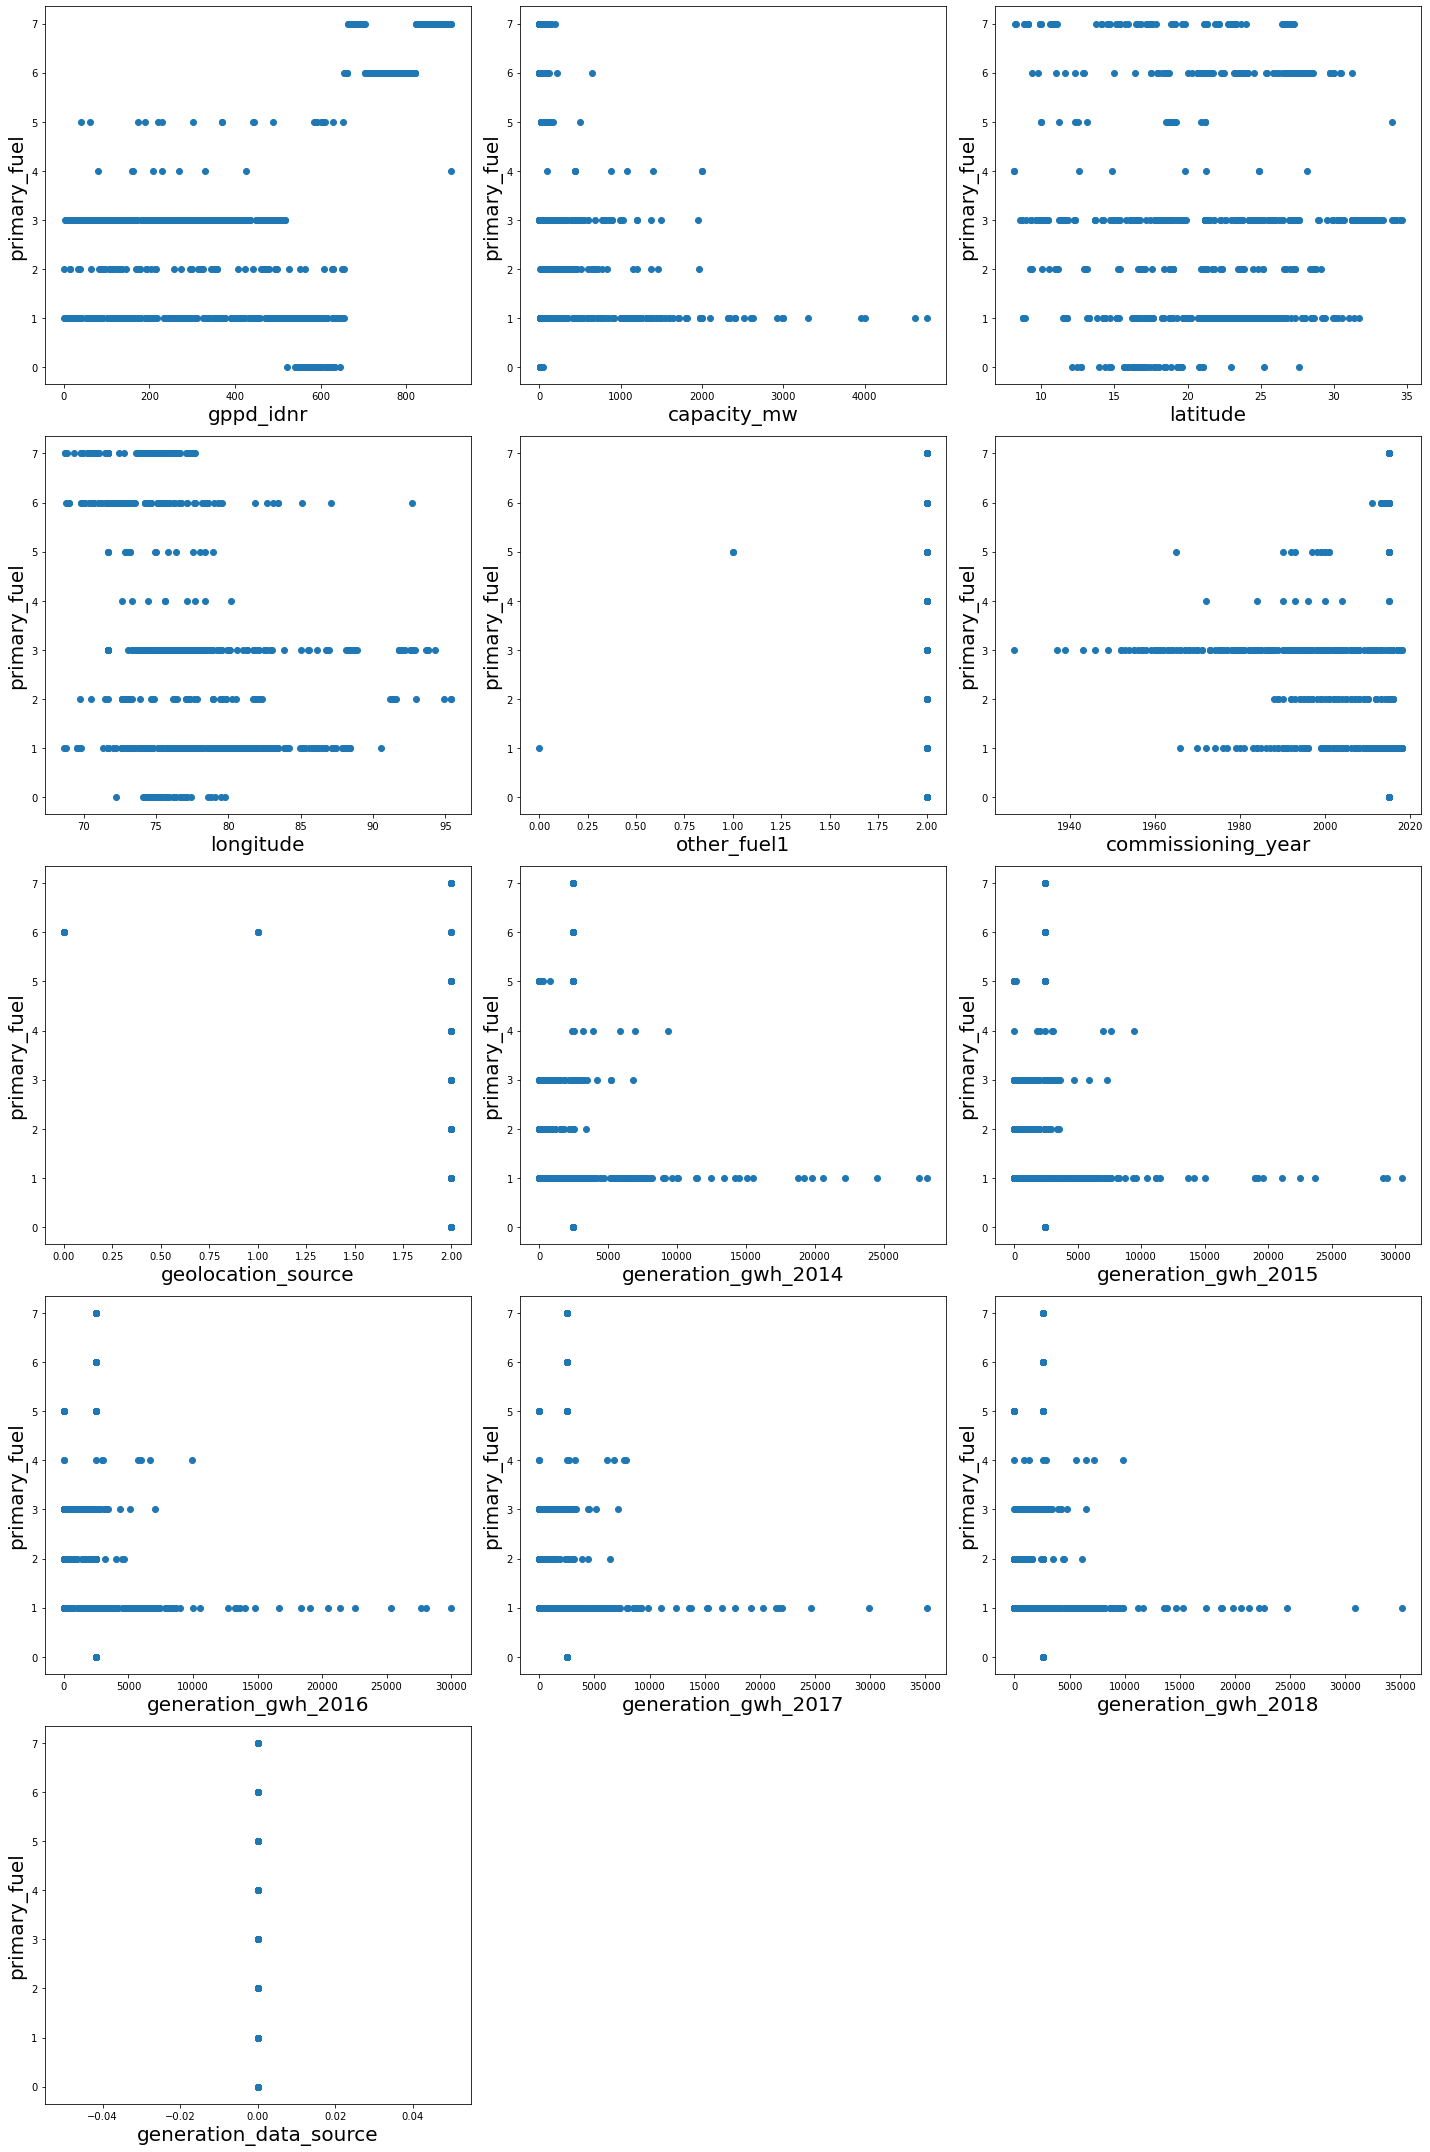

In [19]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('primary_fuel',fontsize=20)
    pltnumber+=1
plt.tight_layout()

## Dist pLot

0.0
3.1184079967331835
-0.14945055596924278
1.1283816992395856
0.4714691858252111
-20.419278999342378
-1.71203584916001
-2.1562674966245035
5.027114264962847
5.355258888519198
5.0600405946953915
5.102495862625161
4.929737177345132
0.0


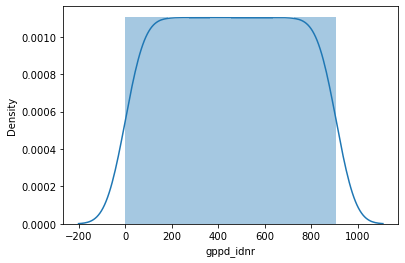

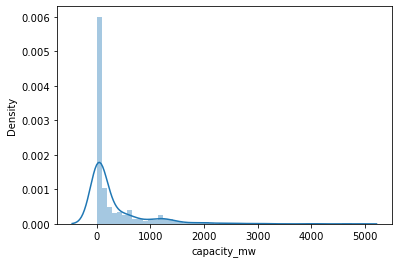

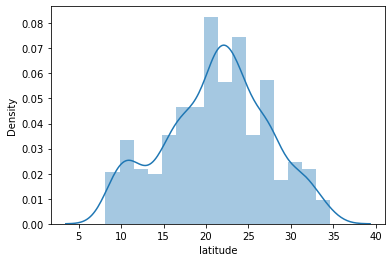

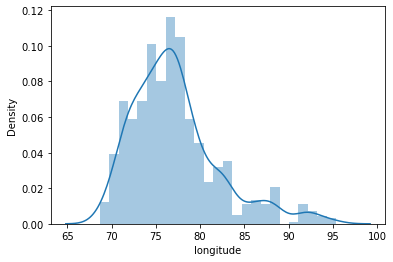

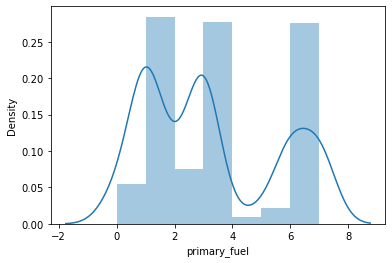

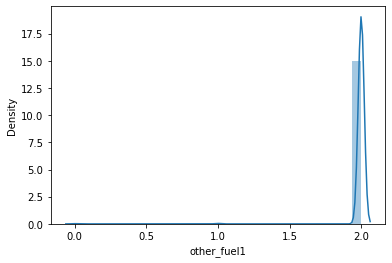

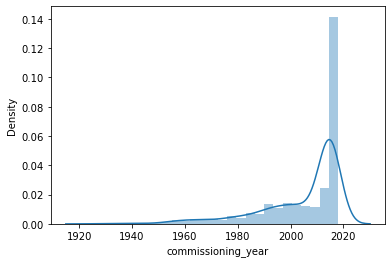

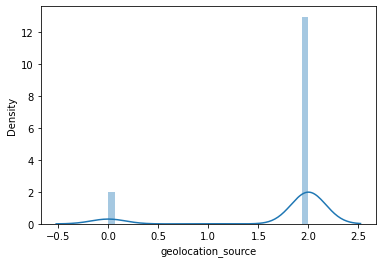

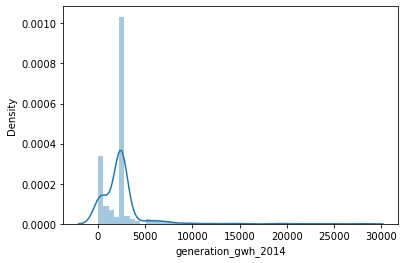

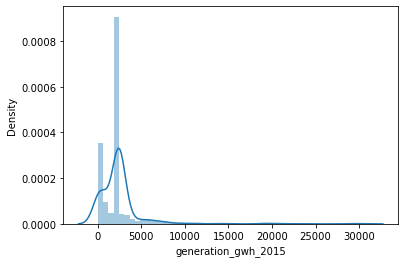

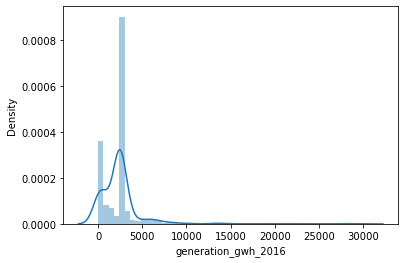

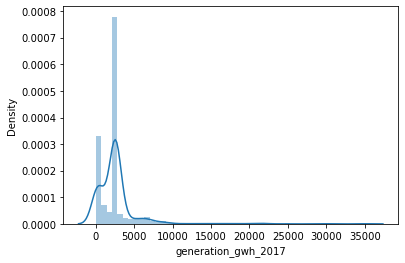

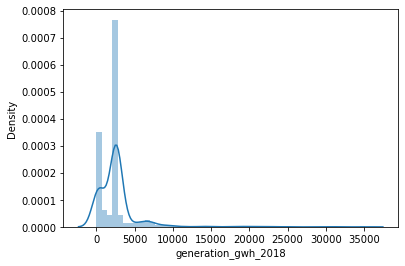

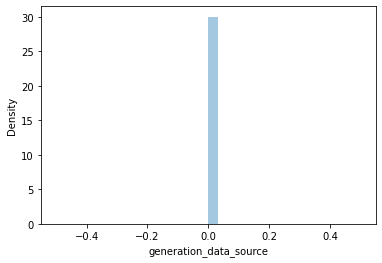

In [20]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [21]:
df.skew()

gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.130252
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.714873
geolocation_source        -2.159841
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

In [22]:
df["capacity_mw"]=np.cbrt(df["capacity_mw"])
df["generation_gwh_2014"]=np.cbrt(df["generation_gwh_2014"])
df["generation_gwh_2015"]=np.cbrt(df["generation_gwh_2015"])
df["generation_gwh_2016"]=np.cbrt(df["generation_gwh_2016"])
df["generation_gwh_2017"]=np.cbrt(df["generation_gwh_2017"])
df["generation_gwh_2018"]=np.cbrt(df["generation_gwh_2018"])
df.skew()

gppd_idnr                  0.000000
capacity_mw                1.013378
latitude                  -0.149698
longitude                  1.130252
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.714873
geolocation_source        -2.159841
generation_gwh_2014       -0.371187
generation_gwh_2015       -0.269579
generation_gwh_2016       -0.279323
generation_gwh_2017       -0.331857
generation_gwh_2018       -0.316915
generation_data_source     0.000000
dtype: float64

In [23]:
scaler=PowerTransformer(method='yeo-johnson')
features=["other_fuel1","geolocation_source"]
df[features]=scaler.fit_transform(df[features].values)
df[features]

,other_fuel1,geolocation_source
0,0.057607,-2.345400
1,0.057607,0.396062
2,0.057607,0.396062
3,0.057607,0.396062
4,0.057607,0.396062
...,...,...
902,0.057607,0.396062
903,0.057607,-2.530510
904,0.057607,0.396062
905,0.057607,0.396062


## Heatmap and VIF

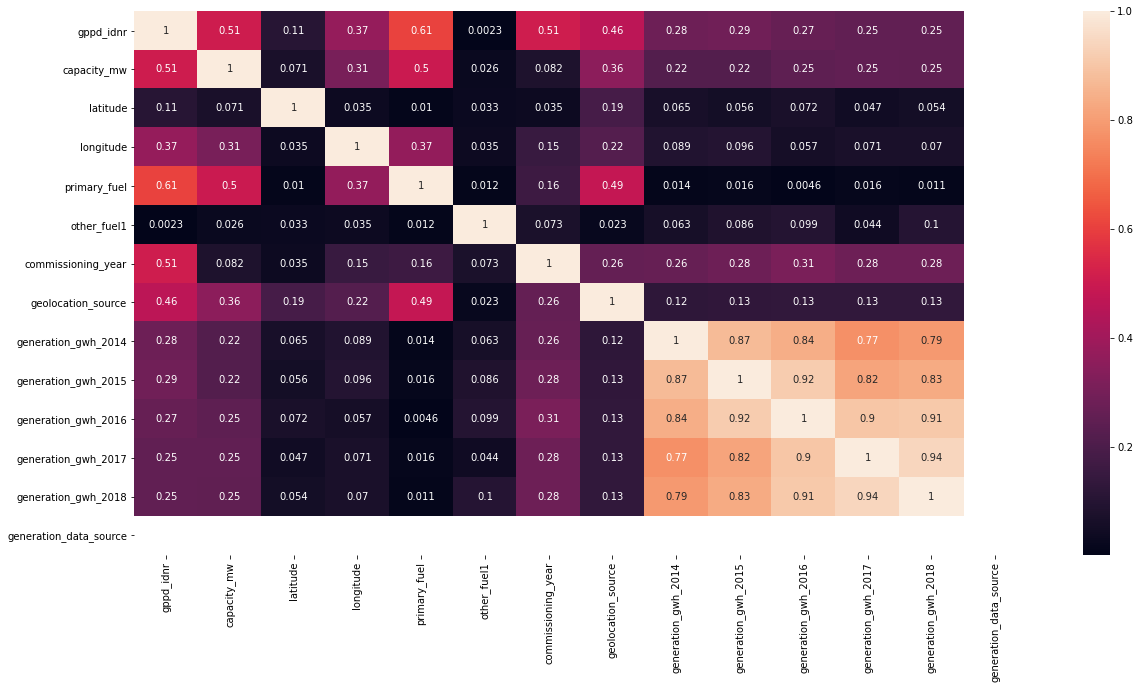

In [24]:
df_corr=df.corr().abs()
df_corr
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)
plt.show()

In [25]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [26]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,2.622666,gppd_idnr
1,1.934672,capacity_mw
2,1.114536,latitude
3,1.205421,longitude
4,1.056517,other_fuel1
5,1.492622,commissioning_year
6,1.430761,geolocation_source
7,4.540263,generation_gwh_2014
8,8.215220,generation_gwh_2015
9,12.280145,generation_gwh_2016


In [28]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,657,1.357209,28.1839,73.2407,6,0.057607,2011.0,-2.345400,13.447576,13.440944,13.513816,13.657969,13.752106,0
1,519,4.610436,24.7663,74.6090,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.513816,13.657969,13.752106,0
2,853,3.396999,21.9038,69.3732,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.513816,13.657969,13.752106,0
3,0,5.129928,23.8712,91.3602,2,0.057607,2004.0,0.396062,8.516872,9.449397,9.604586,8.723154,8.555526,0
4,1,12.164404,21.9603,82.4091,1,0.057607,2015.0,0.396062,14.479241,18.086385,18.413278,17.528476,19.380155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,11.696071,16.2949,77.3568,1,0.057607,2016.0,0.396062,13.447576,0.998289,6.158697,9.529548,8.821590,0
903,822,1.442250,12.8932,78.1654,6,0.057607,2015.0,-2.530510,13.447576,13.440944,13.513816,13.657969,13.752106,0
904,891,2.943383,15.2758,75.5811,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.513816,13.657969,13.752106,0
905,539,4.308869,24.3500,73.7477,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.513816,13.657969,13.752106,0


In [29]:
df=df.drop(["generation_gwh_2018","generation_data_source"],axis=1)
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,657,1.357209,28.1839,73.2407,6,0.057607,2011.0,-2.345400,13.447576,13.440944,13.657969,13.752106
1,519,4.610436,24.7663,74.6090,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969,13.752106
2,853,3.396999,21.9038,69.3732,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969,13.752106
3,0,5.129928,23.8712,91.3602,2,0.057607,2004.0,0.396062,8.516872,9.449397,8.723154,8.555526
4,1,12.164404,21.9603,82.4091,1,0.057607,2015.0,0.396062,14.479241,18.086385,17.528476,19.380155
...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,11.696071,16.2949,77.3568,1,0.057607,2016.0,0.396062,13.447576,0.998289,9.529548,8.821590
903,822,1.442250,12.8932,78.1654,6,0.057607,2015.0,-2.530510,13.447576,13.440944,13.657969,13.752106
904,891,2.943383,15.2758,75.5811,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969,13.752106
905,539,4.308869,24.3500,73.7477,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969,13.752106


In [30]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [31]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,2.621551,gppd_idnr
1,1.934638,capacity_mw
2,1.111776,latitude
3,1.197029,longitude
4,1.053205,other_fuel1
5,1.475359,commissioning_year
6,1.430725,geolocation_source
7,4.515272,generation_gwh_2014
8,5.568047,generation_gwh_2015
9,9.715043,generation_gwh_2017


In [32]:
df=df.drop(["generation_gwh_2018"],axis=1)
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,657,1.357209,28.1839,73.2407,6,0.057607,2011.0,-2.345400,13.447576,13.440944,13.657969
1,519,4.610436,24.7663,74.6090,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969
2,853,3.396999,21.9038,69.3732,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969
3,0,5.129928,23.8712,91.3602,2,0.057607,2004.0,0.396062,8.516872,9.449397,8.723154
4,1,12.164404,21.9603,82.4091,1,0.057607,2015.0,0.396062,14.479241,18.086385,17.528476
...,...,...,...,...,...,...,...,...,...,...,...
902,491,11.696071,16.2949,77.3568,1,0.057607,2016.0,0.396062,13.447576,0.998289,9.529548
903,822,1.442250,12.8932,78.1654,6,0.057607,2015.0,-2.530510,13.447576,13.440944,13.657969
904,891,2.943383,15.2758,75.5811,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969
905,539,4.308869,24.3500,73.7477,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969


In [34]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [35]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,2.621542,gppd_idnr
1,1.932082,capacity_mw
2,1.111772,latitude
3,1.197028,longitude
4,1.025818,other_fuel1
5,1.475159,commissioning_year
6,1.429623,geolocation_source
7,4.461037,generation_gwh_2014
8,5.409726,generation_gwh_2015
9,3.287624,generation_gwh_2017


# Taking "primary_fuel" As Label

# Using KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [37]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [38]:
scaler=StandardScaler()

In [39]:
X_scaled=scaler.fit_transform(X)

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [41]:
knn=KNeighborsClassifier()

In [42]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [43]:
Y_pred=knn.predict(X_test)

In [44]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[13,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 58,  5,  2,  0,  1,  0,  0],
       [ 0,  3,  6,  2,  0,  1,  0,  1],
       [ 0,  5,  3, 51,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  2],
       [ 3,  2,  0,  0,  0,  0,  0, 24]], dtype=int64)

In [45]:
accuracy=accuracy_score(Y_test,Y_pred)

In [46]:
accuracy

0.8061674008810573

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       0.82      0.82      0.82        71
           2       0.35      0.46      0.40        13
           3       0.88      0.86      0.87        59
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       1.00      0.94      0.97        33
           7       0.89      0.83      0.86        29

    accuracy                           0.81       227
   macro avg       0.57      0.61      0.58       227
weighted avg       0.80      0.81      0.80       227



# USING KNN WITH HYPERPARAMETER TUNING

In [51]:
scaler=StandardScaler()

In [52]:
X_scaled=scaler.fit_transform(X)

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [54]:
knn=KNeighborsClassifier()

In [55]:
param_grid=[
    {'algorithm':['kd_tree','brute'],
    'leaf_size':[15,18],
    'n_neighbors':[3,5,7]
    }
]

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1,verbose=2)

In [58]:
clf.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute'],
                          'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]}],
             verbose=2)

In [59]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 3}

In [60]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [61]:
accuracy=accuracy_score(Y_test,Y_pred)

In [62]:
accuracy

0.7973568281938326

In [63]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[13,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 55,  7,  3,  0,  1,  0,  0],
       [ 0,  2,  8,  1,  0,  1,  0,  1],
       [ 0,  8,  2, 49,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  2],
       [ 2,  2,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.76      0.77      0.77        71
           2       0.42      0.62      0.50        13
           3       0.89      0.83      0.86        59
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       1.00      0.94      0.97        33
           7       0.89      0.86      0.88        29

    accuracy                           0.80       227
   macro avg       0.58      0.63      0.60       227
weighted avg       0.79      0.80      0.79       227



# MODELLING WITH RANDOM FOREST


In [66]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[12  1  0  0  0  0  0  0]
 [ 4 56  4  7  0  0  0  0]
 [ 0  3  6  3  0  1  0  0]
 [ 0  3  1 54  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  2  1  0  2  0  0]
 [ 0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 29]]
0.8414096916299559
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.84      0.79      0.81        71
           2       0.43      0.46      0.44        13
           3       0.83      0.92      0.87        59
           4       0.00      0.00      0.00         2
           5       0.50      0.29      0.36         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.84       227
   macro avg       0.67      0.67      0.66       227
weighted avg       0.83      0.84      0.84       227



# RANDOM FOREST WITH HYPERPARAMETER (RANDOM AND GRID)

In [70]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [71]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [72]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [73]:
best_random_grid=rf_randomcv.best_estimator_

In [74]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=600)

In [75]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[12  1  0  0  0  0  0  0]
 [ 4 61  3  3  0  0  0  0]
 [ 0  3  5  4  0  1  0  0]
 [ 0  5  0 54  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  2  0  3  0  0]
 [ 0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 29]]
Accuracy Score 0.8634361233480177
Classification report:               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.84      0.86      0.85        71
           2       0.50      0.38      0.43        13
           3       0.86      0.92      0.89        59
           4       0.00      0.00      0.00         2
           5       0.75      0.43      0.55         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.86       227
   macro avg       0.71      0.69      0.69       227
weighted avg       0.85      0.86      0.86       227



# GRID SEARCH CV

In [76]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [78]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [79]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=500)

In [80]:
best_grid=grid_search.best_estimator_

In [81]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=500)

In [82]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[12  1  0  0  0  0  0  0]
 [ 4 61  3  3  0  0  0  0]
 [ 0  3  5  4  0  1  0  0]
 [ 0  4  0 55  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  2  0  3  0  0]
 [ 0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 29]]
Accuracy Score 0.8678414096916299
Classification report:               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.85      0.86      0.85        71
           2       0.50      0.38      0.43        13
           3       0.86      0.93      0.89        59
           4       0.00      0.00      0.00         2
           5       0.75      0.43      0.55         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.87       227
   macro avg       0.71      0.69      0.69       227
weighted avg       0.86      0.87      0.86       227



In [83]:
accuracy=accuracy_score(Y_test,Y_pred)

In [84]:
accuracy

0.8678414096916299

# DECISION TREE


In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [89]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [90]:
Y_pred=dt.predict(X_test)


In [91]:
accuracy=accuracy_score(Y_test,Y_pred)

In [92]:
accuracy

0.8105726872246696

In [93]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[13,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 53, 10,  3,  1,  1,  0,  0],
       [ 0,  3,  2,  7,  0,  1,  0,  0],
       [ 0,  5,  4, 50,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  5,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

In [95]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.84      0.75      0.79        71
           2       0.11      0.15      0.13        13
           3       0.82      0.85      0.83        59
           4       0.00      0.00      0.00         2
           5       0.71      0.71      0.71         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.81       227
   macro avg       0.66      0.68      0.67       227
weighted avg       0.82      0.81      0.82       227



# DECISIONTREE WITH HYPER PARAMETER

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [97]:
dt=DecisionTreeClassifier()


In [98]:
param_grid = {
               'max_depth': range(3,12,3),
               'min_samples_split': range(4,10,3),
               'min_samples_leaf': range(3,10,3),
              'criterion':['entropy','gini']}


In [99]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [100]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 12, 3),
                         'min_samples_leaf': range(3, 10, 3),
                         'min_samples_split': range(4, 10, 3)},
             verbose=2)

In [101]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [102]:
Y_pred=clf.predict(X_test)


In [103]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[13,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 53, 15,  1,  0,  1,  0,  0],
       [ 0,  3,  5,  5,  0,  0,  0,  0],
       [ 0,  7,  4, 48,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  5,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

In [104]:
accuracy=accuracy_score(Y_test,Y_pred)

In [105]:
accuracy

0.8149779735682819

In [107]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.83      0.75      0.79        71
           2       0.19      0.38      0.26        13
           3       0.86      0.81      0.83        59
           4       0.00      0.00      0.00         2
           5       0.83      0.71      0.77         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.81       227
   macro avg       0.70      0.70      0.70       227
weighted avg       0.84      0.81      0.83       227



# GRADIENT BOOSTING

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
X=df.drop(columns="primary_fuel")
Y=df["primary_fuel"]

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [111]:
gbdt=GradientBoostingClassifier()

In [112]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [113]:
Y_pred=gbdt.predict(X_test)


In [114]:
accuracy=accuracy_score(Y_test,Y_pred)

In [115]:
accuracy

0.8414096916299559

In [116]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[12,  1,  0,  0,  0,  0,  0,  0],
       [ 5, 58,  3,  3,  0,  2,  0,  0],
       [ 0,  2,  5,  6,  0,  0,  0,  0],
       [ 0,  5,  1, 52,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  2,  2,  1,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

In [117]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.83      0.82      0.82        71
           2       0.45      0.38      0.42        13
           3       0.84      0.88      0.86        59
           4       0.50      0.50      0.50         2
           5       0.50      0.29      0.36         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.84       227
   macro avg       0.73      0.72      0.72       227
weighted avg       0.84      0.84      0.84       227



# GBDT WITH HYPER PARAMETER

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [119]:
gbdt=GradientBoostingClassifier()

In [120]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [121]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [122]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [123]:
clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 6}

In [124]:
Y_pred=clf.predict(X_test)


In [125]:
accuracy=accuracy_score(Y_test,Y_pred)

In [126]:
accuracy

0.8634361233480177

In [127]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[11,  2,  0,  0,  0,  0,  0,  0],
       [ 3, 61,  3,  3,  0,  1,  0,  0],
       [ 0,  3,  5,  4,  0,  1,  0,  0],
       [ 0,  4,  0, 55,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  2,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

In [129]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.84      0.86      0.85        71
           2       0.50      0.38      0.43        13
           3       0.86      0.93      0.89        59
           4       0.00      0.00      0.00         2
           5       0.60      0.43      0.50         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29

    accuracy                           0.86       227
   macro avg       0.70      0.68      0.68       227
weighted avg       0.85      0.86      0.86       227



# Conclusion:
1. Conducted 4 models on Global Power Plant Project dataset namely KNN, Random Forest, Desicion Tree and Gradient Boosting with Hyperparameter tuning
2. It comes to a conclusion that Random Forest Model is providing best score for Global Power Plant Project dataset
3. Accuracy=0.8678414096916299

# Taking "capacity_mw" As Label

In [131]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,657,1.357209,28.1839,73.2407,6,0.057607,2011.0,-2.345400,13.447576,13.440944,13.657969
1,519,4.610436,24.7663,74.6090,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969
2,853,3.396999,21.9038,69.3732,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969
3,0,5.129928,23.8712,91.3602,2,0.057607,2004.0,0.396062,8.516872,9.449397,8.723154
4,1,12.164404,21.9603,82.4091,1,0.057607,2015.0,0.396062,14.479241,18.086385,17.528476
...,...,...,...,...,...,...,...,...,...,...,...
902,491,11.696071,16.2949,77.3568,1,0.057607,2016.0,0.396062,13.447576,0.998289,9.529548
903,822,1.442250,12.8932,78.1654,6,0.057607,2015.0,-2.530510,13.447576,13.440944,13.657969
904,891,2.943383,15.2758,75.5811,7,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969
905,539,4.308869,24.3500,73.7477,1,0.057607,2015.0,0.396062,13.447576,13.440944,13.657969


In [132]:
X=df.drop(columns="capacity_mw")
Y=df["capacity_mw"]

In [133]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,2.604093,gppd_idnr
1,1.112962,latitude
2,1.210090,longitude
3,1.971723,primary_fuel
4,1.018339,other_fuel1
5,1.484534,commissioning_year
6,1.503304,geolocation_source
7,4.439539,generation_gwh_2014
8,5.406264,generation_gwh_2015
9,3.201505,generation_gwh_2017


# Using Linear Regression

In [151]:
from sklearn.metrics import r2_score

In [144]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [146]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [147]:
Y_pred=lm.predict(X_test)
Y_pred_train=lm.predict(X_train)

In [148]:
lm.score(X_train,Y_train)


0.49568159831023617

In [149]:
lm.score(X_test,Y_test)

0.4570308924168145

In [152]:
r2=r2_score(Y_test,Y_pred)
r2

0.4570308924168145

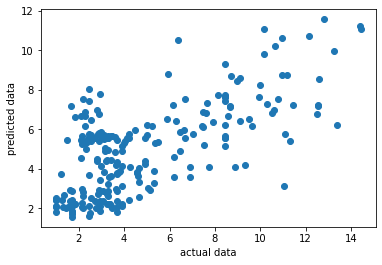

In [153]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# LINEAR REGRESSION USING RIDGE REGRESSION

In [154]:
ridge=Ridge()

In [155]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)


In [156]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [157]:
print(ridge_regressor.best_params_)

{'alpha': 20}


In [158]:
print(ridge_regressor.best_score_)

0.47918990233746167


In [159]:
ridge_regressor.score(X_test,Y_test)

0.45739111064944415

In [160]:
# LINEAR REGRESSION USING RIDGE REGRESSION

ridge=Ridge()

parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)


ridge_regressor.fit(X_train,Y_train)

print(ridge_regressor.best_params_)

print(ridge_regressor.best_score_)

ridge_regressor.score(X_test,Y_test)

{'alpha': 20}
0.47918990233746167


0.45739111064944415

In [174]:
r2=r2_score(Y_test,Y_pred)
r2

0.6063819993331987

# MODEL USING KNN

In [166]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
X=df.drop(columns="capacity_mw")
Y=df["capacity_mw"]

In [162]:
scaler=StandardScaler()

In [163]:
X_scaled=scaler.fit_transform(X)

In [164]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [167]:
knn=KNeighborsRegressor()

In [168]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [169]:
Y_pred=knn.predict(X_test)

In [170]:
knn.score(X_train,Y_train)

0.8171306336774006

In [171]:
knn.score(X_test,Y_test)

0.6063819993331987

In [172]:
r2=r2_score(Y_test,Y_pred)
r2

0.6063819993331987

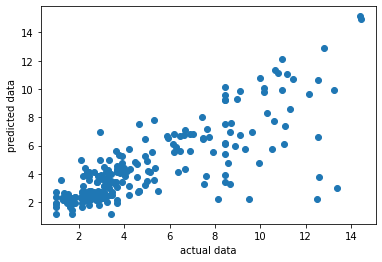

In [173]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN MODEL USING HYPERPARAMETER TUNING

In [175]:
X=df.drop(columns="capacity_mw")
Y=df["capacity_mw"]

In [176]:
scaler=StandardScaler()

In [177]:
X_scaled=scaler.fit_transform(X)

In [178]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [183]:
knn=KNeighborsRegressor()

In [184]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [185]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [186]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [187]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}

In [188]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [189]:
clf.score(X_train,Y_train)

0.8171306336774006

In [190]:
clf.score(X_test,Y_test)

0.6063819993331987

In [191]:
r2=r2_score(Y_test,Y_pred)
r2

0.6063819993331987

# DECISION TREE MODEL

In [192]:
from sklearn.tree import DecisionTreeRegressor

In [193]:
X=df.drop(columns="capacity_mw")
Y=df["capacity_mw"]

In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [195]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [196]:
Y_pred=dt.predict(X_test)

In [197]:
dt.score(X_train,Y_train)

1.0

In [198]:
dt.score(X_test,Y_test)

0.7319523525097615

In [199]:
r2=r2_score(Y_test,Y_pred)
r2

0.7319523525097615

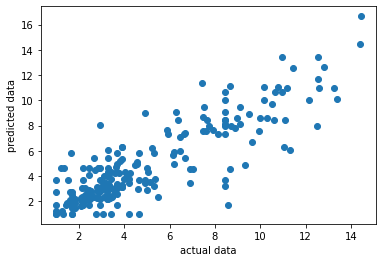

In [200]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE WITH HYPER PARAMETER TUNING

In [201]:
X=df.drop(columns="capacity_mw")
Y=df["capacity_mw"]

In [202]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [203]:
dt=DecisionTreeRegressor()


In [204]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [205]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [206]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [207]:
clf.best_params_

{'criterion': 'mae',
 'max_depth': 7,
 'min_samples_leaf': 9,
 'min_samples_split': 8}

In [208]:
Y_pred=clf.predict(X_test)


In [209]:
clf.score(X_train,Y_train)

0.8730182659530321

In [210]:
clf.score(X_test,Y_test)

0.8047075576262981

In [211]:
r2=r2_score(Y_test,Y_pred)
r2

0.8047075576262981

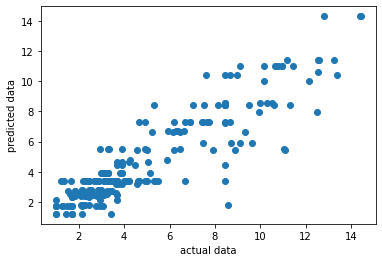

In [212]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [214]:
md=[lm,knn,dt]
import pickle
filename="Global Power Plant.pkl"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
1. Conducted 3 models on Advertising dataset namely, Linear Regression, KNN and Desicion Tree with Hyperparameter tuning
2. It comes to a conclusion that Desicion Tree is providing best score for Global Power Plant Dataset
3. r2_score=0.8047075576262981
